In [484]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import numpy as np
import umap

# Algoritmos de reducción de dimensionalidad
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

# Algoritmos clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score,silhouette_samples


from scipy.spatial.distance import cdist

In [485]:
dataset = pd.read_csv('SmartFarmingCropYield.csv')

# Análisis exploratorio de datos (EDA)

In [486]:
#Creamos copia del dataset original
df = dataset.copy()

#Renombramos las columnas para que no comiencen con un espacio
df.columns = df.columns.str.strip().str.replace(" ", "")

df.head()

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,tipoRiego,tipoFertilizante,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,estadoEnfermedadesCultivo
0,Trigo,35.95,5.99,17.79,75.62,77.03,7.27,NaN,Organico,6.34,122,4408.07,0.63,Leve
1,Soja,19.74,7.24,30.18,89.91,61.13,5.67,Aspersor,Inorganico,9.60,112,5389.98,0.58,NaN
2,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,Goteo,Mixto,15.26,144,2931.16,0.80,Leve
3,Maiz,17.33,6.03,33.73,212.01,70.46,5.03,Aspersor,Organico,25.80,134,4227.80,0.44,NaN
4,Soja,36.28,7.04,21.80,123.38,47.91,4.02,Manual,Mixto,39.29,145,4501.20,0.76,NaN


In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tipoCultivo                311 non-null    object 
 1   humedadSuelo(%)            311 non-null    float64
 2   pHSuelo                    311 non-null    float64
 3   temperatura(°C)            311 non-null    float64
 4   precipitacion(mm)          311 non-null    float64
 5   humedad(%)                 311 non-null    float64
 6   horasLuzSolar              311 non-null    float64
 7   tipoRiego                  220 non-null    object 
 8   tipoFertilizante           311 non-null    object 
 9   mlPesticida                311 non-null    float64
 10  diasTotales                311 non-null    int64  
 11  rendimientoKg_hectarea     311 non-null    float64
 12  indiceNDVI                 311 non-null    float64
 13  estadoEnfermedadesCultivo  228 non-null    object 

**Valores duplicados**

In [488]:
df.duplicated().values.any()

np.False_

**Valores faltantes**

In [489]:
df.isna().sum()

tipoCultivo                   0
humedadSuelo(%)               0
pHSuelo                       0
temperatura(°C)               0
precipitacion(mm)             0
humedad(%)                    0
horasLuzSolar                 0
tipoRiego                    91
tipoFertilizante              0
mlPesticida                   0
diasTotales                   0
rendimientoKg_hectarea        0
indiceNDVI                    0
estadoEnfermedadesCultivo    83
dtype: int64

In [490]:
df[df.isna().any(axis=1)]

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,tipoRiego,tipoFertilizante,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,estadoEnfermedadesCultivo
0,Trigo,35.95,5.99,17.79,75.62,77.03,7.27,NaN,Organico,6.34,122,4408.07,0.63,Leve
1,Soja,19.74,7.24,30.18,89.91,61.13,5.67,Aspersor,Inorganico,9.60,112,5389.98,0.58,NaN
3,Maiz,17.33,6.03,33.73,212.01,70.46,5.03,Aspersor,Organico,25.80,134,4227.80,0.44,NaN
4,Soja,36.28,7.04,21.80,123.38,47.91,4.02,Manual,Mixto,39.29,145,4501.20,0.76,NaN
8,Maiz,42.43,7.07,20.70,224.15,76.53,8.70,NaN,Organico,13.55,127,4942.95,0.65,Leve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Soja,40.46,7.44,18.31,237.68,59.21,8.68,NaN,Mixto,17.22,100,4287.59,0.77,Severo
305,Soja,19.06,7.20,20.93,117.13,45.96,5.34,Aspersor,Inorganico,6.76,149,2531.89,0.79,NaN
307,Trigo,28.81,7.46,30.56,245.13,45.32,8.47,NaN,Mixto,16.58,128,4203.51,0.65,Severo
308,Soja,34.22,6.75,17.46,256.23,45.14,5.78,NaN,Organico,5.05,104,3708.54,0.85,Severo


In [491]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

df

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,tipoRiego,tipoFertilizante,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,estadoEnfermedadesCultivo
0,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,Goteo,Mixto,15.26,144,2931.16,0.80,Leve
1,Maiz,27.10,5.72,22.26,296.33,80.34,5.44,Aspersor,Mixto,47.61,121,5264.09,0.70,Leve
2,Soja,40.54,6.35,19.24,184.82,76.50,5.21,Manual,Inorganico,49.78,118,5598.46,0.50,Leve
3,Trigo,13.39,6.36,23.47,166.76,76.45,8.04,Goteo,Organico,23.12,145,2437.08,0.55,Moderate
4,Soja,12.80,5.87,26.90,218.80,51.76,4.72,Aspersor,Mixto,31.75,116,4629.49,0.42,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Maiz,29.30,6.71,32.93,92.69,87.33,6.34,Manual,Mixto,35.50,128,5528.08,0.31,Leve
159,Maiz,26.91,6.03,15.04,207.79,59.68,9.54,Goteo,Inorganico,45.16,112,2023.56,0.30,Leve
160,Trigo,31.58,5.68,16.02,151.82,55.32,7.80,Aspersor,Organico,20.13,122,3708.29,0.47,Moderate
161,Maiz,32.14,7.44,21.49,286.61,84.20,5.58,Aspersor,Inorganico,45.43,93,4503.82,0.88,Leve


**Distrubuciones de las variables**

In [492]:
#Selección de columnas númericas
cols = ['humedadSuelo(%)', 'pHSuelo', 'temperatura(°C)','precipitacion(mm)', 'humedad(%)', 'horasLuzSolar', 
'mlPesticida', 'diasTotales', 'rendimientoKg_hectarea', 'indiceNDVI']

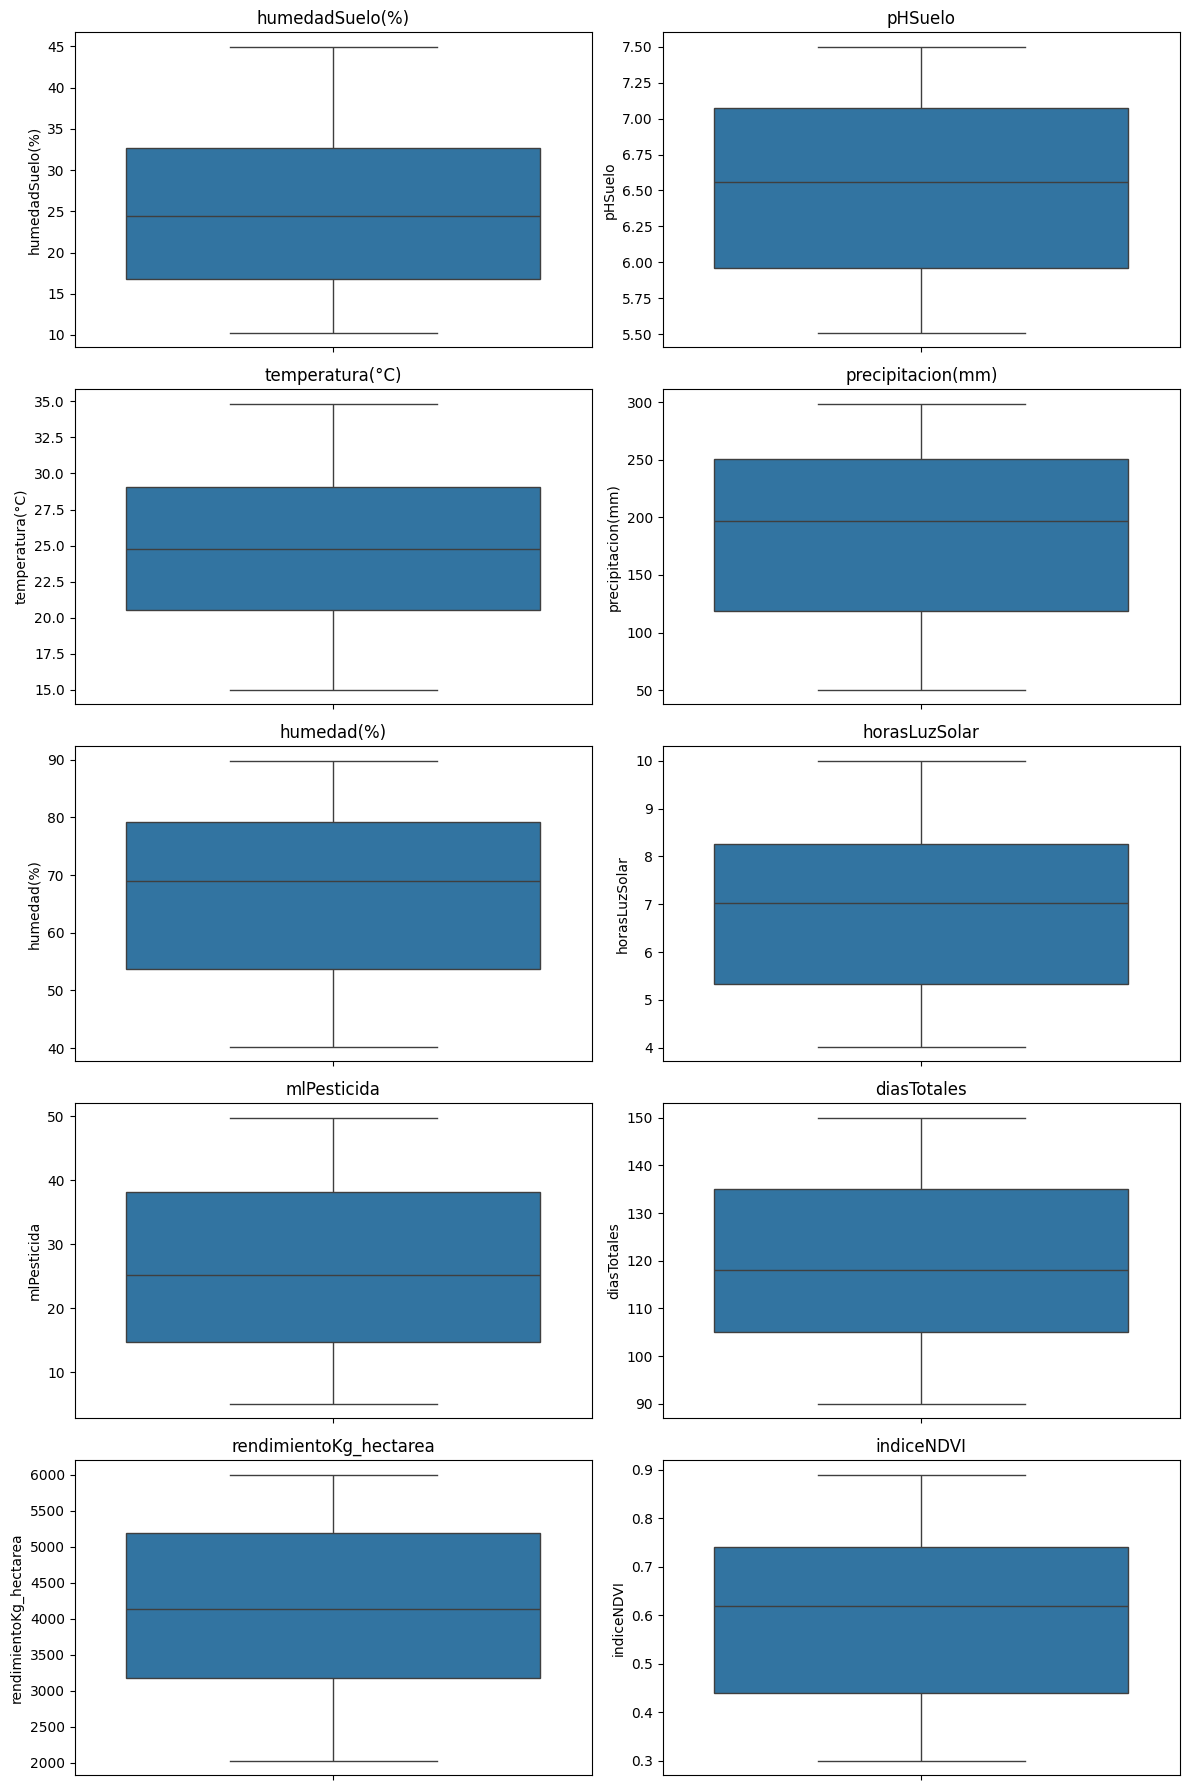

In [493]:
# Definimos el layout → 5 filas x 2 columnas = 10 subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))

# Aplanamos la grilla de ejes
axes = axes.flatten()

# Iteramos
for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Ajustamos diseño
plt.tight_layout()
plt.show()

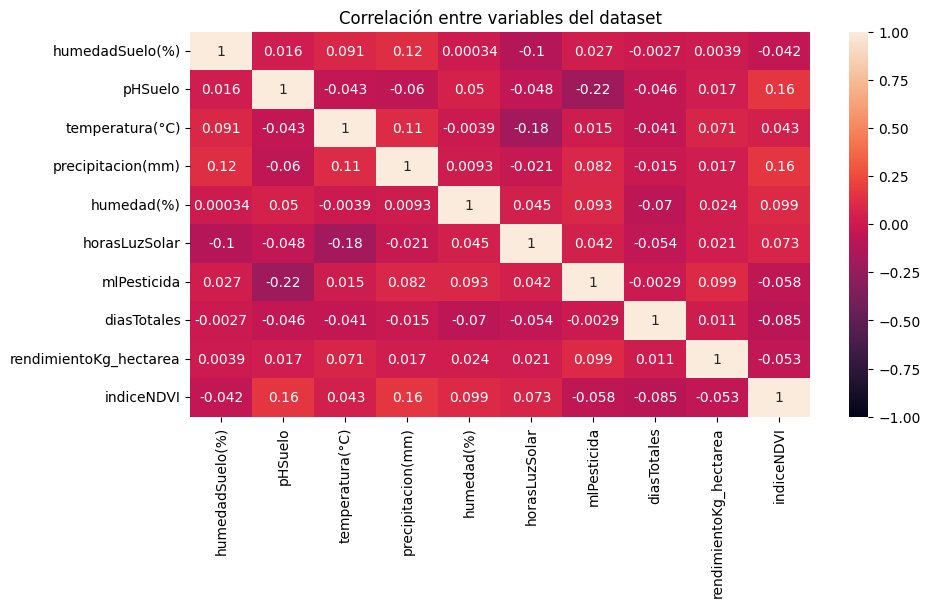

In [494]:
#Selección de columnas númericas
columnas_numericas = ['humedadSuelo(%)', 'pHSuelo', 'temperatura(°C)','precipitacion(mm)', 'humedad(%)', 'horasLuzSolar', 
'mlPesticida', 'rendimientoKg_hectarea', 'indiceNDVI']

plt.figure(figsize=(10,5))
sns.heatmap(df[cols].corr(), vmin=-1, vmax=1, annot=True)
plt.title('Correlación entre variables del dataset')
plt.show()

**Codificación de variables catgorícas**

In [495]:
df = pd.get_dummies(data=df, columns=['tipoRiego', 'tipoFertilizante', 'estadoEnfermedadesCultivo'], drop_first=True)

df['mas_120_dias'] = df['diasTotales'].apply(lambda x: True if x > 120 else False)
df.drop(columns='diasTotales', inplace=True)

df

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo,mas_120_dias
0,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,15.26,2931.16,0.80,True,False,True,False,False,False,True
1,Maiz,27.10,5.72,22.26,296.33,80.34,5.44,47.61,5264.09,0.70,False,False,True,False,False,False,True
2,Soja,40.54,6.35,19.24,184.82,76.50,5.21,49.78,5598.46,0.50,False,True,False,False,False,False,False
3,Trigo,13.39,6.36,23.47,166.76,76.45,8.04,23.12,2437.08,0.55,True,False,False,True,True,False,True
4,Soja,12.80,5.87,26.90,218.80,51.76,4.72,31.75,4629.49,0.42,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Maiz,29.30,6.71,32.93,92.69,87.33,6.34,35.50,5528.08,0.31,False,True,True,False,False,False,True
159,Maiz,26.91,6.03,15.04,207.79,59.68,9.54,45.16,2023.56,0.30,True,False,False,False,False,False,False
160,Trigo,31.58,5.68,16.02,151.82,55.32,7.80,20.13,3708.29,0.47,False,False,False,True,True,False,True
161,Maiz,32.14,7.44,21.49,286.61,84.20,5.58,45.43,4503.82,0.88,False,False,False,False,False,False,False


**Normalización de las variables**

In [496]:
cols_bool = [
    "tipoRiego_Goteo",
    "tipoRiego_Manual",
    "tipoFertilizante_Mixto",
    "tipoFertilizante_Organico",
    "estadoEnfermedadesCultivo_Moderate",
    "estadoEnfermedadesCultivo_Severo",
    "mas_120_dias"
]

X = df.drop(columns=['tipoCultivo'])
y = df['tipoCultivo']

scaler = StandardScaler()
x_num_escaladas = scaler.fit_transform(X[columnas_numericas])

x_escalado = X.copy()
x_escalado[columnas_numericas] = x_num_escaladas

x_escalado[cols_bool] = x_escalado[cols_bool].astype('int')

x_escalado

,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo,mas_120_dias
0,0.394017,1.040927,0.468253,1.084461,0.129232,0.715899,-0.807933,-1.060408,1.132157,1,0,1,0,0,0,1
1,0.173440,-1.323141,-0.511037,1.501523,0.951804,-0.874106,1.589491,0.961703,0.569187,0,0,1,0,0,0,1
2,1.508827,-0.288861,-1.089796,-0.003546,0.676418,-1.005182,1.750307,1.251525,-0.556753,0,1,0,0,0,0,0
3,-1.188775,-0.272444,-0.279151,-0.247304,0.672833,0.607619,-0.225437,-1.488661,-0.275268,1,0,0,1,1,0,1
4,-1.247397,-1.076884,0.378181,0.455088,-1.097812,-1.284430,0.414123,0.411652,-1.007130,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.392030,0.302156,1.533782,-1.247039,1.453092,-0.361201,0.692032,1.190522,-1.626397,0,1,1,0,0,0,1
159,0.154561,-0.814210,-1.894692,0.306484,-0.529829,1.462461,1.407924,-1.847087,-1.682694,1,0,0,0,0,0,0
160,0.618569,-1.388809,-1.706883,-0.448952,-0.842507,0.470845,-0.447022,-0.386816,-0.725645,0,0,0,1,1,0,1
161,0.674210,1.500607,-0.658602,1.370331,1.228624,-0.794321,1.427933,0.302725,1.582534,0,0,0,0,0,0,0


# PCA

In [497]:
# Obtener todas las componentes principales
pca = PCA(n_components=x_escalado.shape[1])

pca_features = pca.fit_transform(x_escalado)

# PC dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9',
             'PC10', 'PC11', 'PC12', 'PC13'])
pca_df['tipoCultivo'] = y

pca_df

ValueError: Shape of passed values is (163, 16), indices imply (163, 13)

componentes principales?

In [ ]:
# Creamos función para acumular la varianza
def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

In [ ]:
var_c = acumular(pca.explained_variance_ratio_)
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_,
                        'Proporción de variancia explicada':pca.explained_variance_ratio_,
                        'Proporción acumulado de variancia explicada': var_c})
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,1.369026,0.137228,0.137228
1,1.311700,0.131482,0.268711
2,1.228661,0.123159,0.391869
3,1.048525,0.105102,0.496971
4,0.969188,0.097149,0.594121
5,0.952866,0.095513,0.689634
6,0.800370,0.080228,0.769862
7,0.752460,0.075425,0.845287
8,0.670281,0.067188,0.912474
9,0.271447,0.027209,0.939684


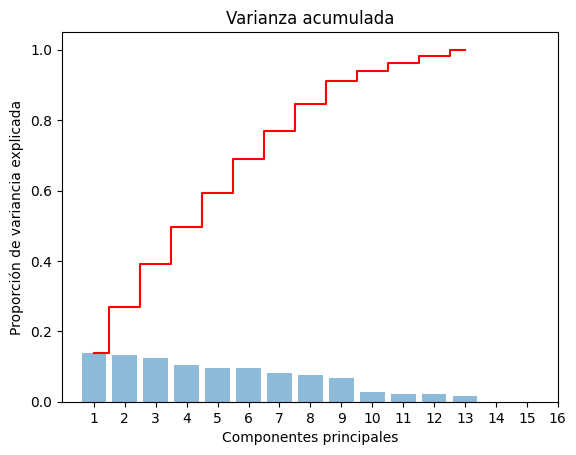

In [ ]:
plt.bar(range(1,14), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,14), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.title('Varianza acumulada')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componentes principales')
plt.xticks([x for x in range(1,17,1)])
plt.show()

In [ ]:
pca_filtrado = pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'tipoCultivo']]

In [ ]:
features = pca_filtrado.drop(columns=['tipoCultivo']).columns.to_list()

unique_tipoCultivo = pca_filtrado['tipoCultivo'].unique()
num_colors = len(unique_tipoCultivo)
color_palette = plt.get_cmap('tab20', num_colors)

tipoCultivo_color_map = {cultivo: mcolors.to_hex(color_palette(i)) for i,
                       cultivo in enumerate(unique_tipoCultivo)}

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig = px.scatter(pca_features, x=0, y=1, color = pca_filtrado["tipoCultivo"],
                 labels={'color': 'tipoCultivo'},
                 color_discrete_map=tipoCultivo_color_map,
                 title="Distribución de tipoCultivo en 2 dimensiones")

fig.show()

explicacion

# ISOMAP

In [ ]:
isomap = Isomap(n_neighbors=34, n_components=2)
X_reduced = isomap.fit_transform(x_escalado)

df_isomap = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
df_isomap['tipoCultivo'] = y

In [ ]:
fig_isomap_2d = px.scatter(df_isomap, x='PC1', y='PC2', color='tipoCultivo',
                    labels = {'color':'tipoCultivo', 0:'PC1',1:'PC2'},
                    title='ISOMAP')
fig_isomap_2d.show()

# T-SNE

In [ ]:
tsne = TSNE(n_components=2, init='random', method='exact', random_state=42, max_iter=1000, perplexity=30) 
X_reduced_tsne = tsne.fit_transform(x_escalado)

tsne_df = pd.DataFrame(data=X_reduced_tsne, columns=['PC1', 'PC2'])
tsne_df['tipoCultivo'] = y

In [ ]:
fig_tsne_2d = px.scatter(tsne_df, x='PC1', y='PC2', color = y,
                         labels = {'color':'tipoCultivo', 0:'PC1',1:'PC2'},
                         title='T-SNE 2D Con PC1 y PC2')
fig_tsne_2d.show()

# K-MEANS

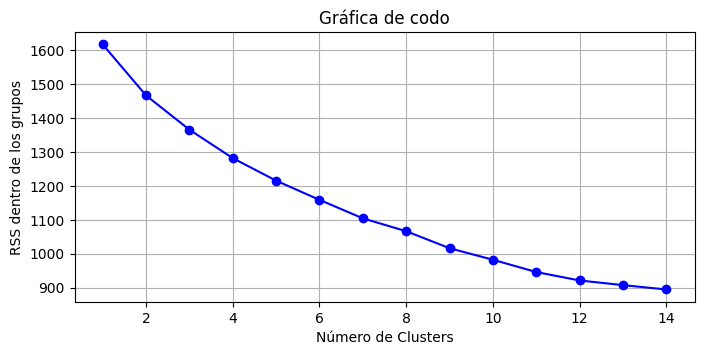

In [ ]:
Nc = range(1, 15)
kmeans = [KMeans(n_clusters=k, random_state=42).fit(x_escalado) for k in Nc]

# La suma de residuos cuadrados intra grupos de kMeans en sklearn se guarda en
# el atributo inertia
inertias = [model.inertia_ for model in kmeans]

plt.figure(figsize=(8, 3.5))
plt.plot(Nc,inertias, "bo-")
plt.xlabel('Número de Clusters')
plt.ylabel('RSS dentro de los grupos')
plt.title('Gráfica de codo')
plt.grid()
plt.show()

GAP

In [ ]:
def calculate_intra_cluster_dispersion(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(x_escalado)
    return kmeans.inertia_

In [ ]:
gaps = []
max_k = 10

# Calcula el Gap Statistic para determinar el número óptimo de clusters

for k in range(1, max_k + 1):
    # Calculo la inercia real sobre mis datos reales
    real_inertia = calculate_intra_cluster_dispersion(x_escalado, k)
    #Calculo la inercia de datos aleatorios con la misma estructura que mis datos originales
    inertia_list = []
    for _ in range(10):
      random_data = np.random.rand(*x_escalado.shape)
      intra_cluster_dispersion = calculate_intra_cluster_dispersion(random_data, k)
      inertia_list.append(intra_cluster_dispersion)

    reference_inertia = np.mean(inertia_list)

    #Aplico la funcion de gap
    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)

#se selecciona el valor de k (número de clusters) que maximiza el Gap Statistic.
optimal_kmeans = np.argmax(gaps) + 1

print("Número óptimo de clusters según el Gap Statistic:", optimal_kmeans)

Número óptimo de clusters según el Gap Statistic: 1


In [ ]:
# Creamos el modelo
kmeans = KMeans(n_clusters=5, random_state=42) #init='k-means++', n_init=5, algorithm='lloyd'
kmeans.fit(x_escalado) 

# Guardamos las etiquetas
df_kmeans = x_escalado.copy()

# El metodo labels_ nos da a que cluster corresponde cada observacion
df_kmeans['Etiquetas KMeans'] = kmeans.labels_
df_kmeans['Etiquetas KMeans'] = df_kmeans['Etiquetas KMeans'].astype('category')

df_kmeans.head()

,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Manual,tipoFertilizante_Mixto,estadoEnfermedadesCultivo_Severo,mas_120_dias,Etiquetas KMeans
0,0.394017,1.040927,0.468253,1.084461,0.129232,0.715899,-0.807933,-1.060408,1.132157,0,1,0,1,0
1,0.173440,-1.323141,-0.511037,1.501523,0.951804,-0.874106,1.589491,0.961703,0.569187,0,1,0,1,4
2,1.508827,-0.288861,-1.089796,-0.003546,0.676418,-1.005182,1.750307,1.251525,-0.556753,1,0,0,0,4
3,-1.188775,-0.272444,-0.279151,-0.247304,0.672833,0.607619,-0.225437,-1.488661,-0.275268,0,0,0,1,2
4,-1.247397,-1.076884,0.378181,0.455088,-1.097812,-1.284430,0.414123,0.411652,-1.007130,0,1,0,0,3


In [ ]:
np.set_printoptions(precision=6)
#kmeans.cluster_centers_
# caracteristicas normalizadas que tendria el centroide de ese cluster.

fig = px.scatter_3d(df_kmeans, x='rendimientoKg_hectarea', y='precipitacion(mm)', z='humedad(%)',
                    color='Etiquetas KMeans',
                    title='Dispersión de las variedades de trigo (K-means)')
fig.show()

# Clustering jerarquico

In [ ]:
x_escalado

,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Manual,tipoFertilizante_Mixto,estadoEnfermedadesCultivo_Severo,mas_120_dias
0,0.394017,1.040927,0.468253,1.084461,0.129232,0.715899,-0.807933,-1.060408,1.132157,0,1,0,1
1,0.173440,-1.323141,-0.511037,1.501523,0.951804,-0.874106,1.589491,0.961703,0.569187,0,1,0,1
2,1.508827,-0.288861,-1.089796,-0.003546,0.676418,-1.005182,1.750307,1.251525,-0.556753,1,0,0,0
3,-1.188775,-0.272444,-0.279151,-0.247304,0.672833,0.607619,-0.225437,-1.488661,-0.275268,0,0,0,1
4,-1.247397,-1.076884,0.378181,0.455088,-1.097812,-1.284430,0.414123,0.411652,-1.007130,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.392030,0.302156,1.533782,-1.247039,1.453092,-0.361201,0.692032,1.190522,-1.626397,1,1,0,1
159,0.154561,-0.814210,-1.894692,0.306484,-0.529829,1.462461,1.407924,-1.847087,-1.682694,0,0,0,0
160,0.618569,-1.388809,-1.706883,-0.448952,-0.842507,0.470845,-0.447022,-0.386816,-0.725645,0,0,0,1
161,0.674210,1.500607,-0.658602,1.370331,1.228624,-0.794321,1.427933,0.302725,1.582534,0,0,0,0


In [ ]:
Z = linkage(x_escalado, "ward")

TypeError: 'str' object is not callable

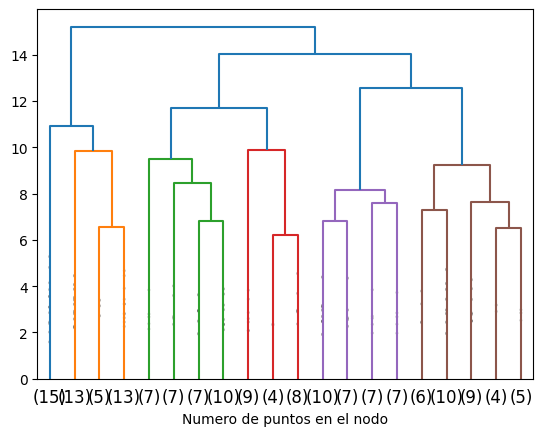

In [ ]:
dendrogram(Z,  truncate_mode = 'lastp', p = 20, show_leaf_counts = True, show_contracted = True)
plt.axhline(y=110, c='k', linestyle='dashed')
plt.xlabel("Numero de puntos en el nodo")
plt.show()

In [ ]:
def calculate_intra_cluster_dispersion_clustering(X_scaled, k, linkage='ward'):
    clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    labels = clustering.fit_predict(X_scaled)
    X_arr = np.array(X_scaled)  # <-- aquí
    centroids = np.array([np.mean(X_arr[labels == i], axis=0) for i in range(k)])
    intra_cluster_dispersion = np.sum(np.linalg.norm(X_arr - centroids[labels], axis=1)**2)
    return intra_cluster_dispersion


In [ ]:
gaps = []
max_k = 15
for k in range(1, max_k + 1):
    real_inertia = calculate_intra_cluster_dispersion_clustering(x_escalado, k, linkage='ward')

    inertia_list = []
    for _ in range(10):
      random_data = np.random.rand(*x_escalado.shape)
      intra_cluster_dispersion = calculate_intra_cluster_dispersion_clustering(random_data, k)
      inertia_list.append(intra_cluster_dispersion)

    reference_inertia = np.mean(inertia_list)

    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)

optimal_k = np.argmax(gaps) + 1

Número óptimo de clusters según el Gap Statistic: 14


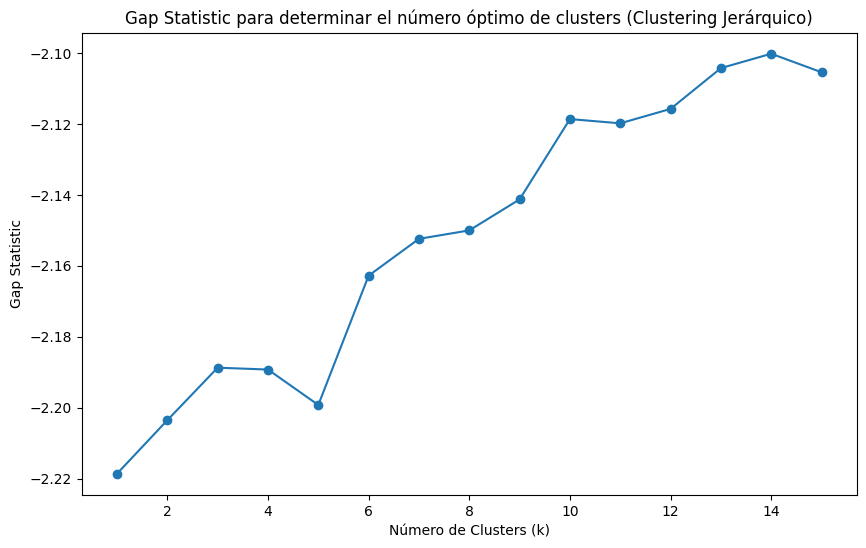

In [ ]:
print("Número óptimo de clusters según el Gap Statistic:", optimal_k)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), gaps, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic para determinar el número óptimo de clusters (Clustering Jerárquico)')
plt.show()

In [ ]:
n_clusters = 5

clustering = AgglomerativeClustering(n_clusters=n_clusters)

cluster_assignments = clustering.fit_predict(x_escalado) # Asigna los clusters a los datos

df_clustering = x_escalado.copy()

df_clustering['Etiquetas jerarquico'] = cluster_assignments # Añade la columna con el cluster asignado a cada punto

df_clustering.head()

,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Manual,tipoFertilizante_Mixto,estadoEnfermedadesCultivo_Severo,mas_120_dias,Etiquetas jerarquico
0,0.394017,1.040927,0.468253,1.084461,0.129232,0.715899,-0.807933,-1.060408,1.132157,0,1,0,1,0
1,0.173440,-1.323141,-0.511037,1.501523,0.951804,-0.874106,1.589491,0.961703,0.569187,0,1,0,1,2
2,1.508827,-0.288861,-1.089796,-0.003546,0.676418,-1.005182,1.750307,1.251525,-0.556753,1,0,0,0,0
3,-1.188775,-0.272444,-0.279151,-0.247304,0.672833,0.607619,-0.225437,-1.488661,-0.275268,0,0,0,1,1
4,-1.247397,-1.076884,0.378181,0.455088,-1.097812,-1.284430,0.414123,0.411652,-1.007130,0,1,0,0,4


In [ ]:
fig = px.scatter_3d(df_clustering, x='rendimientoKg_hectarea', y='precipitacion(mm)', z='humedad(%)',
                    color='Etiquetas jerarquico',
                    title='Dispersión de las variedades de trigo (Clustering)')
fig.show()

In [ ]:
silhouette_avg = silhouette_score(x_escalado, cluster_assignments)
silhouette_avg

0.06194261490090062

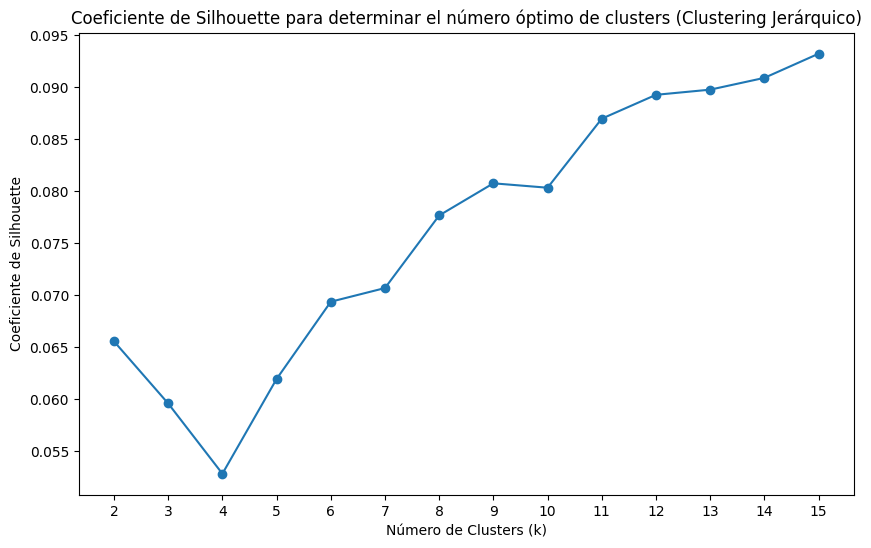

In [ ]:
def calculate_silhouette(X_scaled, k, linkage='ward'):
    clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    labels = clustering.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    sample_silhouette_values = silhouette_samples(X_scaled, labels)
    return silhouette_avg, sample_silhouette_values

max_k = 15

silhouette_scores = []
for k in range(2, max_k + 1):
    silhouette_avg, _ = calculate_silhouette(x_escalado, k)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Coeficiente de Silhouette para determinar el número óptimo de clusters (Clustering Jerárquico)')
plt.xticks([x for x in range(2, 16, 1)])
plt.show()

Número óptimo de clusters según el Gap Statistic (ward/euclidean): 15


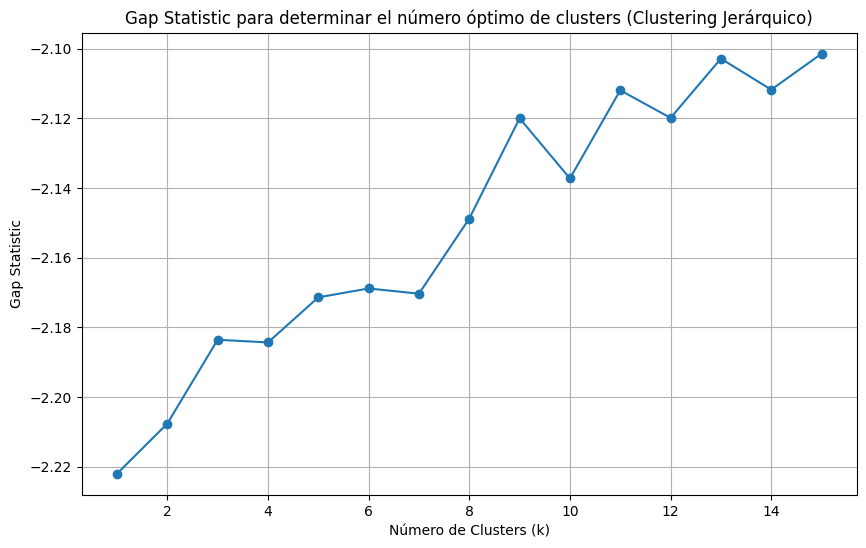


Buscando la mejor combinación de parámetros y k con Silhouette Score:
  Linkage: ward, Métrica: euclidean, k: 13, Silhouette: 0.0898
  Linkage: ward, Métrica: euclidean, k: 14, Silhouette: 0.0909
  Linkage: ward, Métrica: euclidean, k: 15, Silhouette: 0.0932


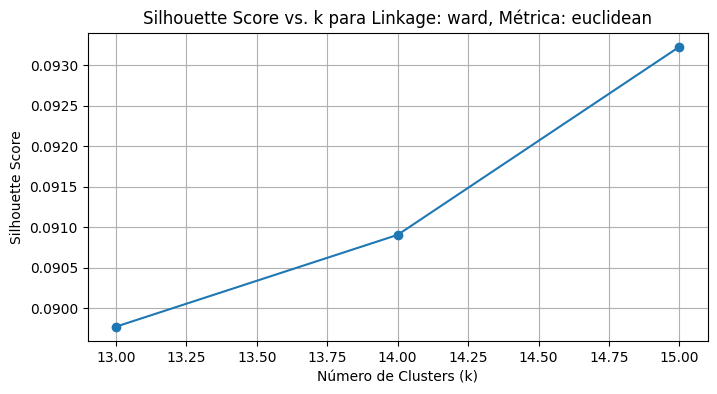

  Linkage: complete, Métrica: euclidean, k: 13, Silhouette: 0.0553
  Linkage: complete, Métrica: euclidean, k: 14, Silhouette: 0.0586
  Linkage: complete, Métrica: euclidean, k: 15, Silhouette: 0.0626


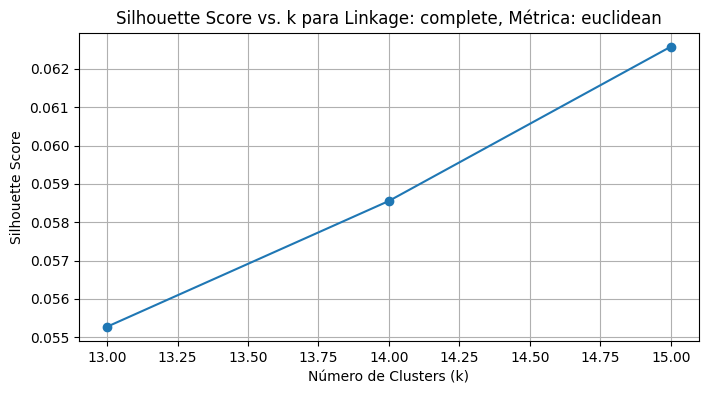

  Linkage: complete, Métrica: manhattan, k: 13, Silhouette: 0.0414
  Linkage: complete, Métrica: manhattan, k: 14, Silhouette: 0.0450
  Linkage: complete, Métrica: manhattan, k: 15, Silhouette: 0.0427


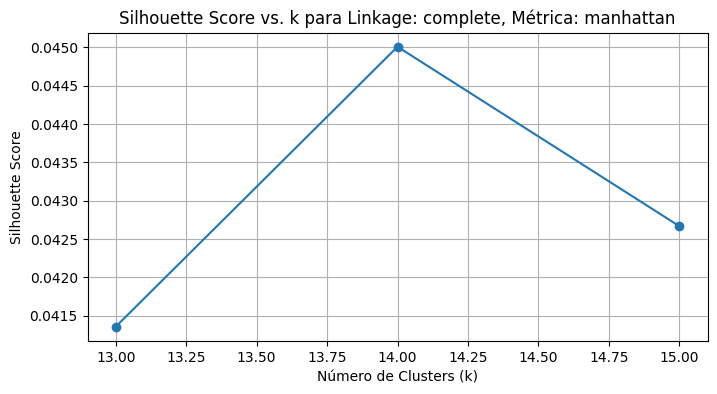

  Linkage: complete, Métrica: cosine, k: 13, Silhouette: 0.0512
  Linkage: complete, Métrica: cosine, k: 14, Silhouette: 0.0552
  Linkage: complete, Métrica: cosine, k: 15, Silhouette: 0.0678


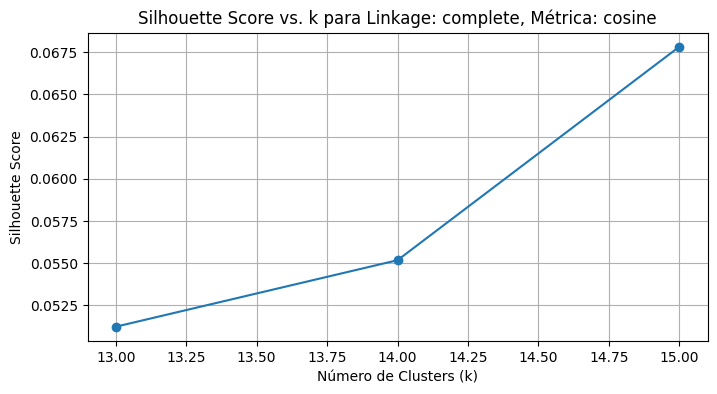

  Linkage: average, Métrica: euclidean, k: 13, Silhouette: 0.0895
  Linkage: average, Métrica: euclidean, k: 14, Silhouette: 0.0932
  Linkage: average, Métrica: euclidean, k: 15, Silhouette: 0.0897


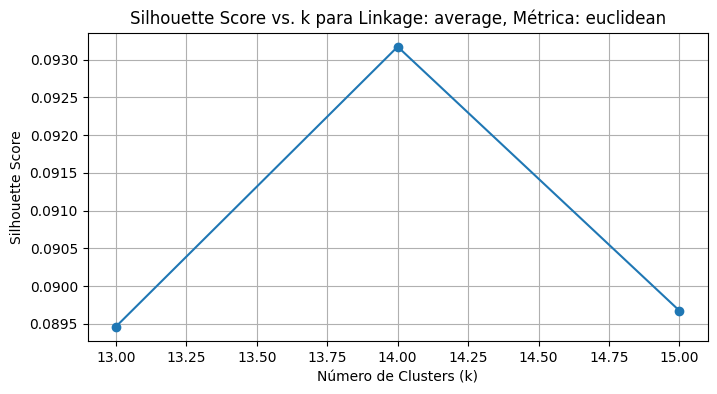

  Linkage: average, Métrica: manhattan, k: 13, Silhouette: 0.0628
  Linkage: average, Métrica: manhattan, k: 14, Silhouette: 0.0540
  Linkage: average, Métrica: manhattan, k: 15, Silhouette: 0.0656


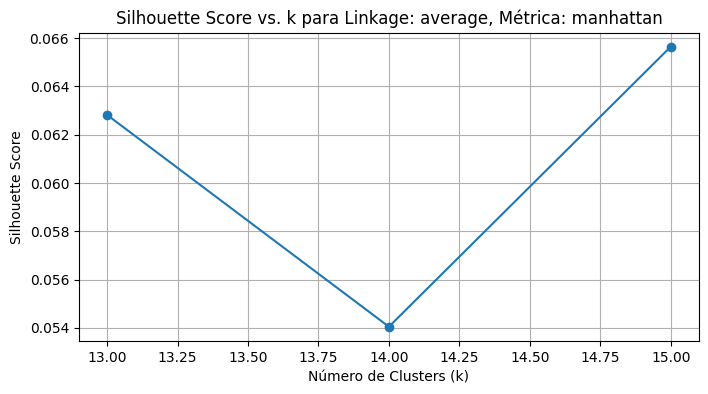

  Linkage: average, Métrica: cosine, k: 13, Silhouette: 0.0826
  Linkage: average, Métrica: cosine, k: 14, Silhouette: 0.0806
  Linkage: average, Métrica: cosine, k: 15, Silhouette: 0.0739


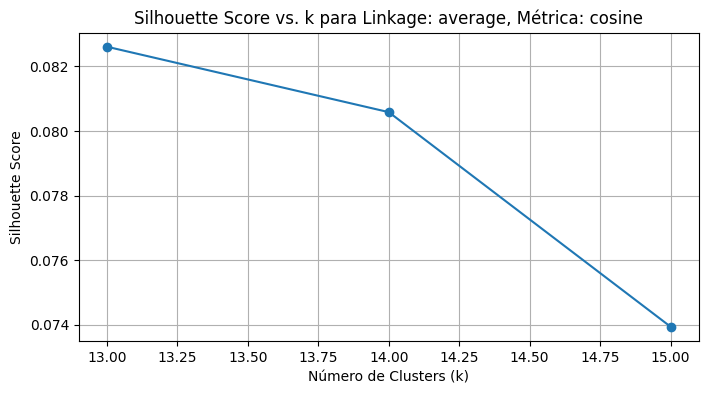

  Linkage: single, Métrica: euclidean, k: 13, Silhouette: -0.1665
  Linkage: single, Métrica: euclidean, k: 14, Silhouette: -0.1712
  Linkage: single, Métrica: euclidean, k: 15, Silhouette: -0.1749


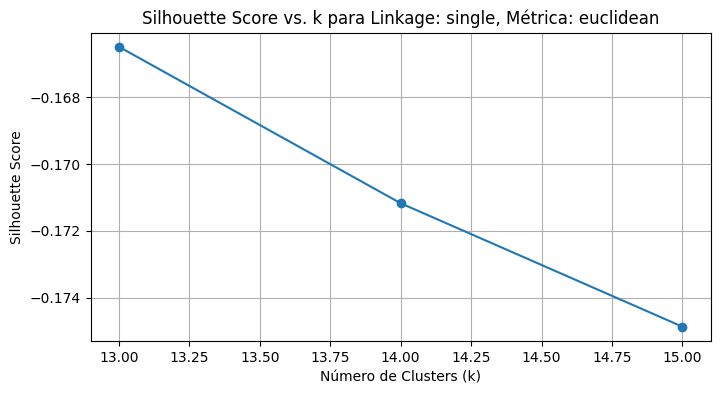

  Linkage: single, Métrica: manhattan, k: 13, Silhouette: -0.1768
  Linkage: single, Métrica: manhattan, k: 14, Silhouette: -0.1818
  Linkage: single, Métrica: manhattan, k: 15, Silhouette: -0.1831


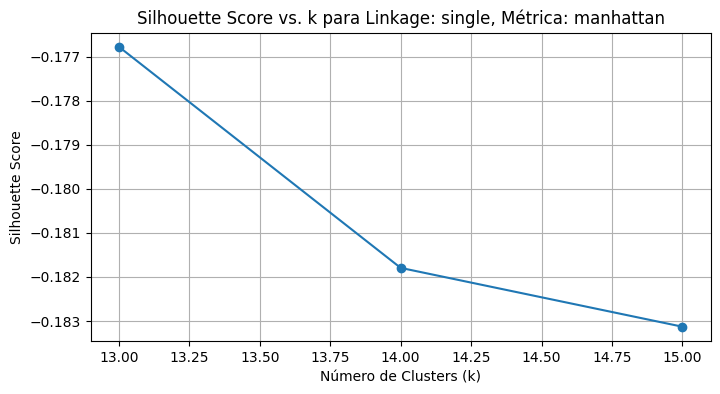

  Linkage: single, Métrica: cosine, k: 13, Silhouette: -0.2224
  Linkage: single, Métrica: cosine, k: 14, Silhouette: -0.2129
  Linkage: single, Métrica: cosine, k: 15, Silhouette: -0.2231


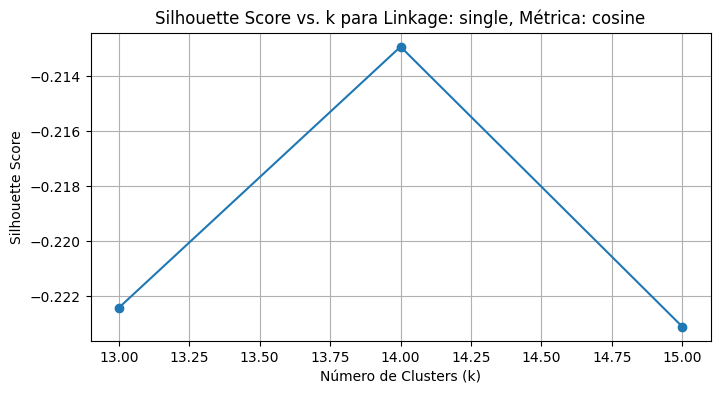


--- Resultados Óptimos ---
Mejor Silhouette Score: 0.0932
Parámetros Óptimos: {'linkage': 'ward', 'metric': 'euclidean', 'n_clusters': 15}


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Asumiendo que x_escalado ya está definido y es tu DataFrame escalado
# x_escalado = ...

linkage_methods = ['ward', 'complete', 'average', 'single']
distance_metrics = ['euclidean', 'manhattan', 'cosine'] # 'ward' solo funciona con 'euclidean'

best_silhouette = -1
best_params = {}
best_cluster_assignments = None

# Primero, vamos a encontrar un k más robusto
# Tu implementación del Gap Statistic es buena, vamos a mantenerla para encontrar un k_inicial
def calculate_intra_cluster_dispersion_clustering(X_scaled, k, linkage_method, metric_val='euclidean'):
    # Ward solo funciona con euclidean
    if linkage_method == 'ward':
        clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage_method)
    else:
        clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage_method, metric=metric_val)

    labels = clustering.fit_predict(X_scaled)
    X_arr = np.array(X_scaled)
    # Evitar error si un cluster está vacío
    centroids = []
    for i in range(k):
        if np.sum(labels == i) > 0:
            centroids.append(np.mean(X_arr[labels == i], axis=0))
        else:
            # Si un cluster está vacío, podrías asignarle el centroide de otro cluster o simplemente manejarlo
            # Aquí, para simplificar, le asignamos el centroide de todo el dataset, lo cual no es ideal
            # pero evita un error si calculate_intra_cluster_dispersion_clustering es llamado con un k demasiado grande
            centroids.append(np.mean(X_arr, axis=0))
    centroids = np.array(centroids)

    # Asegurarse de que labels tenga la misma longitud que X_arr
    intra_cluster_dispersion = np.sum(np.linalg.norm(X_arr - centroids[labels], axis=1)**2)
    return intra_cluster_dispersion

gaps = []
max_k = 15
# Para el Gap Statistic, usualmente se usa 'ward' con 'euclidean'
# Podrías ejecutar el Gap Statistic para cada combinación si quieres, pero es computacionalmente costoso.
# Nos quedaremos con 'ward' para encontrar un k inicial, y luego lo afinaremos con silhouette.
for k in range(1, max_k + 1):
    real_inertia = calculate_intra_cluster_dispersion_clustering(x_escalado, k, linkage_method='ward')

    inertia_list = []
    for _ in range(10): # Reduce el número de iteraciones para mayor velocidad si es necesario
      random_data = np.random.rand(*x_escalado.shape)
      intra_cluster_dispersion = calculate_intra_cluster_dispersion_clustering(random_data, k, linkage_method='ward')
      inertia_list.append(intra_cluster_dispersion)

    reference_inertia = np.mean(inertia_list)

    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)

optimal_k_gap = np.argmax(gaps) + 1
print(f"Número óptimo de clusters según el Gap Statistic (ward/euclidean): {optimal_k_gap}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), gaps, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic para determinar el número óptimo de clusters (Clustering Jerárquico)')
plt.grid(True)
plt.show()

# Ahora, afinemos con Silhouette para k alrededor del óptimo_k_gap y diferentes combinaciones
# Rango de k a explorar, por ejemplo, 2 valores por debajo y 2 por encima del k óptimo
k_range_to_explore = range(max(2, optimal_k_gap - 2), min(max_k + 1, optimal_k_gap + 3))

print("\nBuscando la mejor combinación de parámetros y k con Silhouette Score:")
for linkage in linkage_methods:
    for metric in distance_metrics:
        if linkage == 'ward' and metric != 'euclidean':
            continue # Ward solo funciona con euclidean
        if linkage != 'ward' and metric == 'euclidean': # Si no es ward, euclidean es una opción común
            pass
        elif linkage != 'ward' and metric != 'euclidean': # Para otros linkages y metricas
             pass
        elif linkage == 'ward' and metric == 'euclidean': # Combinación específica
            pass
        else:
            continue # Saltar otras combinaciones no válidas o redundantes

        silhouette_scores_per_k = []
        for n_clusters in k_range_to_explore:
            try:
                if linkage == 'ward':
                    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
                else:
                    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=metric)
                
                cluster_assignments = clustering.fit_predict(x_escalado)

                # Asegurarse de que hay al menos 2 clusters para calcular silhouette score
                if len(np.unique(cluster_assignments)) > 1:
                    silhouette_avg = silhouette_score(x_escalado, cluster_assignments)
                    silhouette_scores_per_k.append((n_clusters, silhouette_avg))

                    print(f"  Linkage: {linkage}, Métrica: {metric}, k: {n_clusters}, Silhouette: {silhouette_avg:.4f}")

                    if silhouette_avg > best_silhouette:
                        best_silhouette = silhouette_avg
                        best_params = {'linkage': linkage, 'metric': metric, 'n_clusters': n_clusters}
                        best_cluster_assignments = cluster_assignments
                else:
                    print(f"  Advertencia: Para Linkage: {linkage}, Métrica: {metric}, k: {n_clusters}, solo se formó 1 cluster. No se puede calcular Silhouette Score.")

            except Exception as e:
                print(f"  Error al procesar Linkage: {linkage}, Métrica: {metric}, k: {n_clusters}. Error: {e}")
                
        # Opcional: Graficar los scores de silueta para esta combinación de linkage/metric
        if silhouette_scores_per_k:
            k_values = [s[0] for s in silhouette_scores_per_k]
            scores = [s[1] for s in silhouette_scores_per_k]
            plt.figure(figsize=(8, 4))
            plt.plot(k_values, scores, marker='o')
            plt.xlabel('Número de Clusters (k)')
            plt.ylabel('Silhouette Score')
            plt.title(f'Silhouette Score vs. k para Linkage: {linkage}, Métrica: {metric}')
            plt.grid(True)
            plt.show()


print("\n--- Resultados Óptimos ---")
print(f"Mejor Silhouette Score: {best_silhouette:.4f}")
print(f"Parámetros Óptimos: {best_params}")

# Visualización con los mejores parámetros
if best_cluster_assignments is not None:
    df_clustering = x_escalado.copy()
    df_clustering['Etiquetas jerarquico'] = best_cluster_assignments

    fig = px.scatter_3d(df_clustering, x='rendimientoKg_hectarea', y='precipitacion(mm)', z='humedad(%)',
                        color='Etiquetas jerarquico',
                        title=f'Dispersión de las variedades de trigo (Clustering Jerárquico Optimizada)\n'
                              f'Linkage: {best_params["linkage"]}, Métrica: {best_params["metric"]}, k: {best_params["n_clusters"]}')
    fig.show()
else:
    print("No se encontraron asignaciones de clusters óptimas.")

In [ ]:
x_escalado.columns

Index(['humedadSuelo(%)', 'pHSuelo', 'temperatura(°C)', 'precipitacion(mm)',
       'humedad(%)', 'horasLuzSolar', 'mlPesticida', 'rendimientoKg_hectarea',
       'indiceNDVI', 'tipoRiego_Manual', 'tipoFertilizante_Mixto',
       'estadoEnfermedadesCultivo_Severo', 'mas_120_dias'],
      dtype='object')

In [ ]:
['tipoRiego_Goteo', 'tipoFertilizante_Organico', 'estadoEnfermedadesCultivo_Moderate']

['tipoRiego_Goteo',
 'tipoFertilizante_Organico',
 'estadoEnfermedadesCultivo_Moderate']